In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

plt.rcParams["figure.dpi"] = 200

N = 1000
vwell = np.full(N, -1)
gammaSquared = 200


In [3]:
def kSquared(energy, potential):
    return gammaSquared * (energy - potential)

def nextPsi(energy, potential, kPrevSquared, kPrevPrevSquared, psiPrev, psiPrevPrev):
    l = 1/N
    
    f1 = 2*(1 - 5/12 * l**2 * kPrevSquared) * psiPrev
    f2 = (1 + 1/12 * l**2 * kPrevPrevSquared) * psiPrevPrev
    f3 = 1 + 1/12 * l**2 * kSquared(energy, potential)
    
    return (f1 - f2) / f3
    

def integratePsi(energy, v):
    psi = np.zeros(N)
    psi[1] = 1e-4
    for i in range(2, N):
        psi[i] = nextPsi(energy, v[i],
            kSquared(energy, v[i-1]),
            kSquared(energy, v[i-2]),
            psi[i-1], psi[i-2]
            )
    return psi

def normalize(psi):
    integral = simpson(psi**2, dx=1/N)
    return psi/np.sqrt(integral)

def shoot(energy, v, tol=5e-4, de=5e-3):
    e = energy

    prevLastPsi = 0

    while(abs(de) > tol):
        psi = integratePsi(e, v)
        psi = normalize(psi)
        
        if psi[-1] * prevLastPsi < 0:
            de = -de/2

        prevLastPsi = psi[-1]
        e += de

    return e

def d2(f):
    res = np.zeros(N)
    for i in range(1, N-1):
        res[i] = N**2 * (f[i-1] - 2 * f[i] + f[i+1])

    return res

## 3 & 4  -- Shooting method

[-0.9505527343749997, -0.8022031249999994, -0.5549863281249988, -0.20884374999999847, 0.23616601562500186, 0.7800820312500025, 1.4229042968749932, 2.1645937499999786, 3.005189453124961, 3.944691406249942]


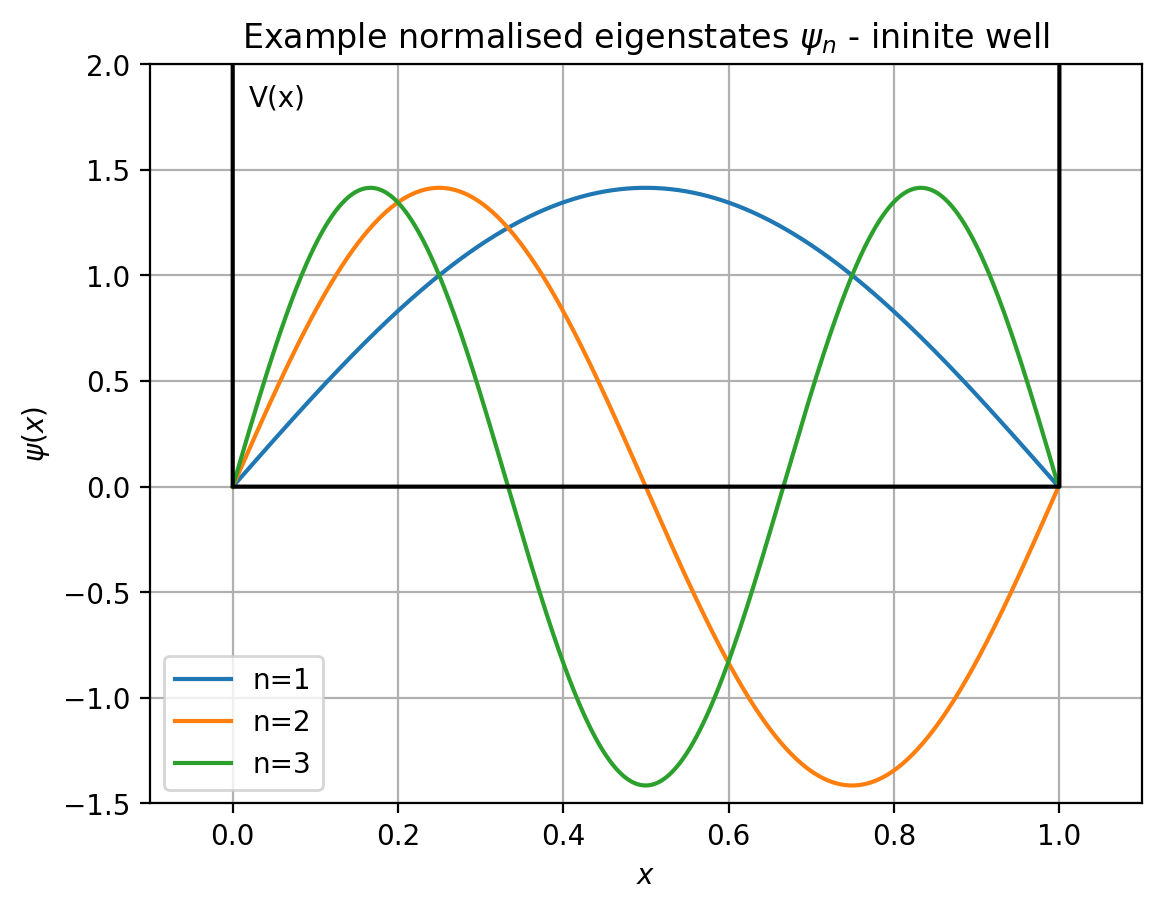

In [4]:
energy = -0.999
gammaSquared=200
N=1000
vwell = np.full(N, -1)
eigenEnergies = []
for i in range(10):
    energy = shoot(energy+5e-3, vwell, tol=1e-5)
    eigenEnergies.append(energy)

    if i<3:
        psi = integratePsi(energy, vwell)
        psi = normalize(psi)
        plt.plot(np.arange(0,1,1/N), psi, label="n="+str(i+1))

plt.title("Example normalised eigenstates " + r'$\psi_n$' + " - ininite well")
plt.ylabel(r"$\psi(x)$")
plt.xlabel(r"$x$")
plt.grid()
plt.plot([-1,-.001,0,1,1.001],[100,100,0,0,100], 'black')
plt.xlim(-0.1,1.1)
plt.ylim(-1.5,2)
plt.text(0.02,1.8,r"V(x)")
plt.legend()
print(eigenEnergies)

In [5]:
calc=np.array([-0.9105572803258896, -0.7316718352317808, -0.552786242318153, -0.3738989006042475, -0.19499698913097313, -0.016005948448180374, 0.1633954845190057, 0.34423041872978305, 0.528873026394845, 0.7212788434028637]
)
for i in calc:
    print("{a:.9f}".format(a=i))
    
anal=np.array([-0.910557281, -0.731671843, -0.552786405, -0.373900966, -0.195015528, -0.0161300899, 0.162755348, 0.341640786, 0.520526225, 0.699411663])
# for i in anal:
#     print("{a:.9f}".format(a=i))

for i in abs(anal-calc):
    print("{a:.9f}".format(a=i))
    

-0.910557280
-0.731671835
-0.552786242
-0.373898901
-0.194996989
-0.016005948
0.163395485
0.344230419
0.528873026
0.721278843
0.000000001
0.000000008
0.000000163
0.000002065
0.000018539
0.000124141
0.000640137
0.002589633
0.008346801
0.021867180


6.579584678952404e-09


Text(0, 0.5, '$\\left|\\psi_1-\\sqrt{2}\\ \\sin(\\pi x)\\right|$')

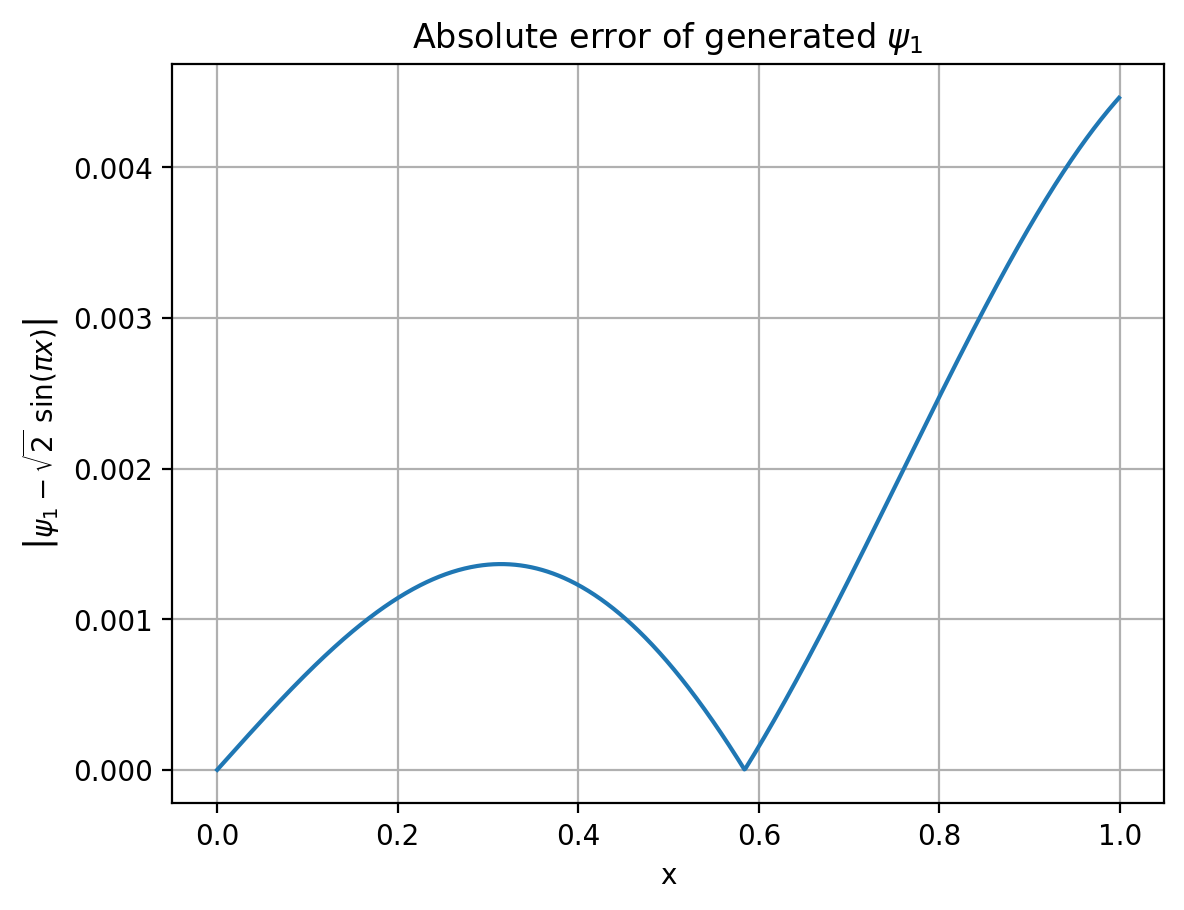

In [6]:
x = np.arange(0,1,1/N)
psi1 = normalize(integratePsi(eigenEnergies[0], vwell))
# plt.plot(x,psi1)
psi2 = np.sqrt(2)*np.sin(np.pi * x)
plt.plot(x,abs(psi1-psi2))
plt.grid()
print(simpson(psi1**2-psi2**2, dx=1/N))
plt.title("Absolute error of generated "+r'$\psi_1$')
plt.xlabel("x")
plt.ylabel(r'$\left|\psi_1-\sqrt{2}\ \sin(\pi x)\right|$')

## 6 -- Uncertainty relation

#### analytic solution energies:
[-0.9506519780, -0.8026079120, -0.5558678020, -0.2104316479, 0.2337005501, 0.7765287922, 1.418053078, 2.158273408, 2.997189782, 3.934802201]

In [7]:
analytic_e = np.array([-0.9506519780, -0.8026079120, -0.5558678020, -0.2104316479, 0.2337005501, 0.7765287922, 1.418053078, 2.158273408, 2.997189782, 3.934802201])
analytic_e0 = -0.95065197799455320691
analytic_e1 = -0.80260791197821282762
analytic_e2 = -0.55586780195097886215

def total_err(x):
    return np.sqrt(np.sum((analytic_e-x)**2))

gammaSquared=200

tols = np.logspace(-5,-1,25)

N=1000
errors1 = [[],[],[]]
for j in tols:
    energy = shoot(-0.999, vwell, tol=j, de=max(1e-3, 2*j))
    errors1[0].append(abs(analytic_e0-energy))
    energy = shoot(-0.85, vwell, tol=j, de=max(1e-3, 2*j))
    errors1[1].append(abs(analytic_e1-energy))
    energy = shoot(-0.6, vwell, tol=j, de=max(1e-3, 2*j))
    errors1[2].append(abs(analytic_e2-energy))
    print(energy)
    

-0.5549765625000002
-0.5549765625000002
-0.5549843750000001
-0.55496875
-0.55496875
-0.5549375
-0.5549375
-0.5548749999999999
-0.5548749999999999
-0.5547499999999999
-0.5547499999999999
-0.5543534313731152
-0.5549999999999999
-0.5544982227037154
-0.55475687150933
-0.5525658350974747
-0.5582257004974851
-0.5523095551659428
-0.5499999999999999
-0.555966021971338
-0.5353669592990435
-0.5683772233983162
-0.5535841116638722
-0.5318707930942038
-0.5


[Text(0.5, 0, 'tolerance'), Text(0, 0.5, 'absolute error')]

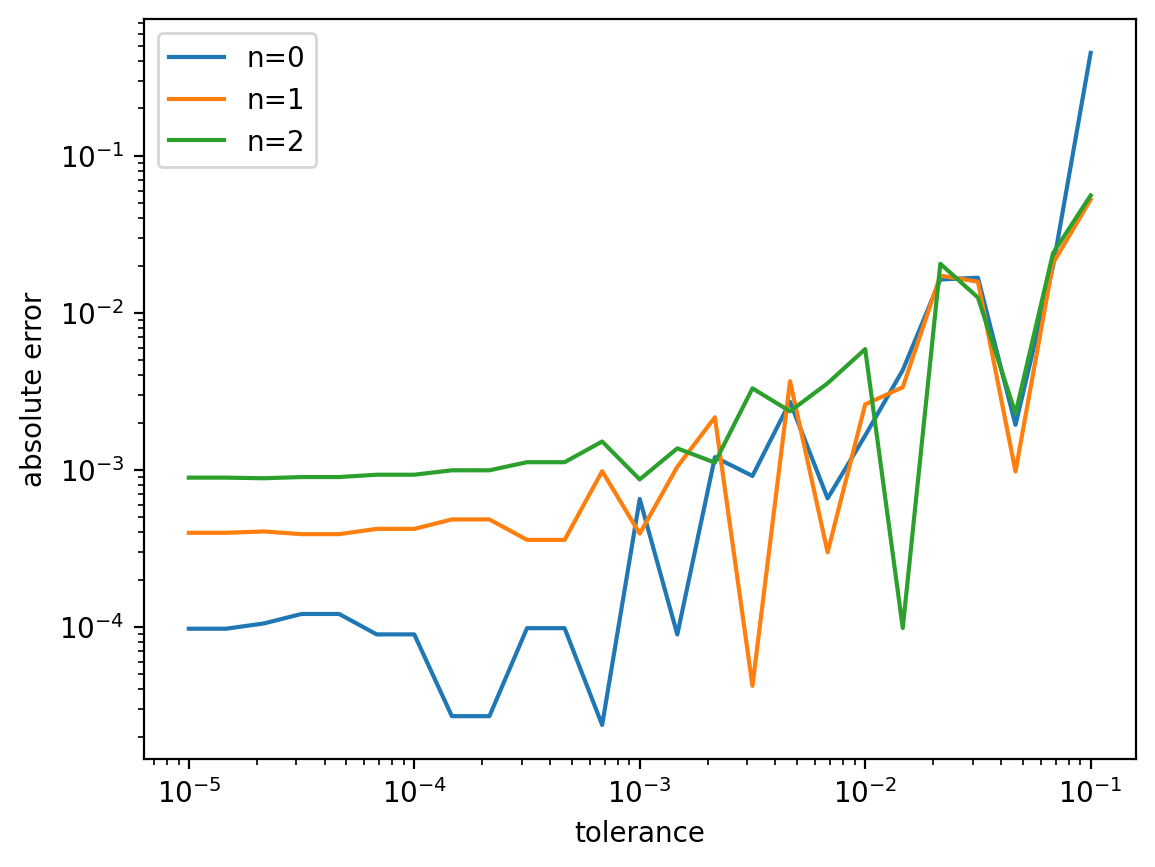

In [11]:
import matplotlib.ticker as ticker
(f, ax) = plt.subplots()

ax.plot(tols, errors1[0], label="n=0")
ax.plot(tols, errors1[1], label="n=1")
ax.plot(tols, errors1[2], label="n=2")

ax.ticklabel_format(useOffset=False)

ax.set(xscale='log', yscale='log')
ax.legend()

ax.set(xlabel="tolerance", ylabel="absolute error")

[-0.9505527343749997, -0.8022031249999994, -0.5549863281249988, -0.20884374999999847, 0.23616601562500186, 0.7800820312500025, 1.4229042968749932, 2.1645937499999786, 3.005189453124961, 3.944691406249942]


Text(0, 0.5, '$\\Delta x \\Delta p$')

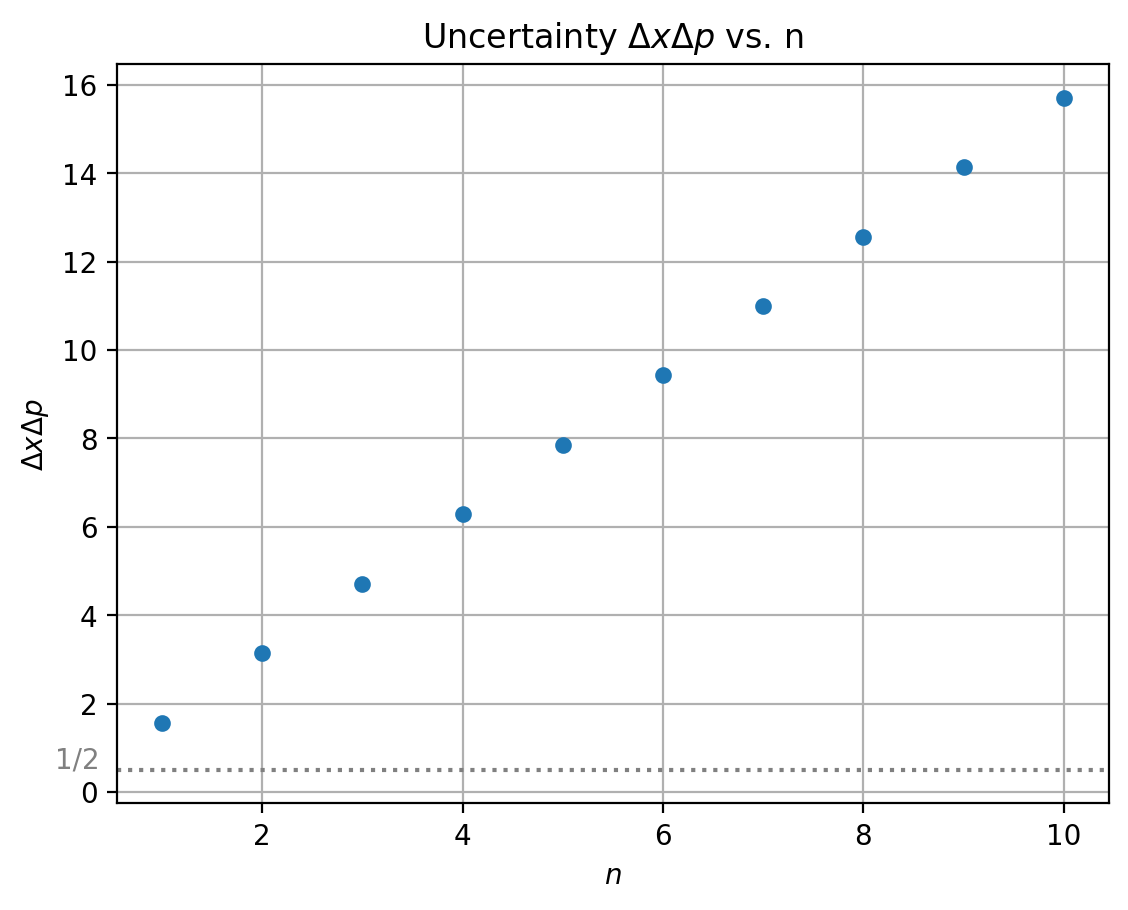

In [10]:
print(eigenEnergies)
plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. n")

x = np.arange(0,1,1/N)
for (i, e) in enumerate(eigenEnergies):
    psi = integratePsi(e, vwell)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.plot(i+1, deltaX*deltaP, 'C0o', markersize=5)

plt.axhline(0.5, linestyle="dotted", color='grey')
plt.text(-0.07, 0.55, "1/2", color='grey')
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$\Delta x \Delta p$")

## 7 -- Harmonic Potential

#### analytic eigenenergies of harmonic potential:
[-0.910557, -0.731672, -0.552786, -0.373901, -0.195016, -0.0161301, 0.162755, 0.341641, 0.520526, 0.699412]

#### analytic eigene. of bounded HO:
no solution??

In [ ]:
x = np.arange(0,1,1/N)
vharm = 8*(x-0.5)**2 - 1

gammaSquared = 1000


In [ ]:
energy = -0.999
eigenEnergiesHarmonic = []
for i in range(20):
    energy = shoot(energy + 1e-4, vharm, tol=1e-9)
    eigenEnergiesHarmonic.append(energy)

    psi = integratePsi(energy, vharm)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x**2 * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. n")
    plt.plot(i+1, deltaX*deltaP, 'C0o', markersize=5)
    if i == 0:
        print(deltaX * deltaP)
    # if i>17:
    
    #     psi = integratePsi(energy)
    #     psi = normalize(psi)
    #     plt.plot(psi)


plt.axhline(0.5, linestyle="dotted", color='grey')
plt.text(-1.4, 0.5, "1/2", color='grey')
plt.grid()
plt.xlabel("n")
plt.xticks(np.concatenate(([1],np.arange(5,25,5))))
plt.ylabel(r"$\Delta x \Delta p$")
print(eigenEnergiesHarmonic)

In [ ]:
xx = np.append(np.append([-10,-.001],np.arange(0,1.05,0.05)),[1.001,10])
yy = np.append(np.append([100,100],8*(np.arange(0,1.05,0.05)-0.5)**2-1),[100,100])
plt.plot(xx,yy, 'black')

for i in range(3):
    plt.plot(x, normalize(integratePsi(eigenEnergiesHarmonic[i], vharm)), label="n="+str(i))

plt.title("Example normalised eigenstates " + r'$\psi_n$' + " - bounded harmonic potential")
plt.legend()
plt.ylabel(r"$\psi(x)$")
plt.xlabel(r"$x$")
plt.grid()
plt.xlim(-0.1,1.1)
plt.ylim(-2.2,3)
plt.text(0.02,2.8,r"V(x)")
print(simpson(psi**2, dx=1/(N-1)))

In [ ]:
xx = np.append(np.append([-10,-.001],np.arange(0,1.05,0.05)),[1.001,10])
yy = np.append(np.append([100,100],8*(np.arange(0,1.05,0.05)-0.5)**2-1),[100,100])
plt.plot(xx,yy, 'black')

for i in range(2):
    plt.plot(x, normalize(integratePsi(eigenEnergiesHarmonic[-5*i-5], vharm)), label="n="+str(20-5*i-5))

plt.title("Example normalised eigenstates " + r'$\psi_n$' + " - bounded harmonic potential")
plt.legend()
plt.ylabel(r"$\psi(x)$")
plt.xlabel(r"$x$")
plt.grid()
plt.xlim(-0.1,1.1)
plt.ylim(-2.2,3)
plt.text(0.02,2.8,r"V(x)")
print(simpson(psi**2, dx=1/(N-1)))

In [ ]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.set(title="Difference between consecutive eigenstate energies")
energyDiff = [100*eigenEnergiesHarmonic[i+1]-100*eigenEnergiesHarmonic[i] for i in range(len(eigenEnergiesHarmonic)-1)]
ax.plot(energyDiff)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1,10,20],[1,10,20])
ax.set_yticks([17.888559291362782, 20, 30, 40],[0.18, 0.2, 0.3, 0.4])
ax.set(xlabel="n", ylabel=r'$\left|\epsilon_{n+1}-\epsilon_n\right|$')

print(100*eigenEnergiesHarmonic[2]-100*eigenEnergiesHarmonic[1])
ax.grid(True)
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set_major_formatter(ScalarFormatter())